In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
pd.options.display.max_rows = 150
pd.options.display.max_columns = 50

In [28]:
df = pd.read_csv("immobilier.csv")
print(df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             1180      5650     1.0           0     0          3      7   
1             2570 

In [29]:
df.shape

(21613, 21)

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<AxesSubplot:>

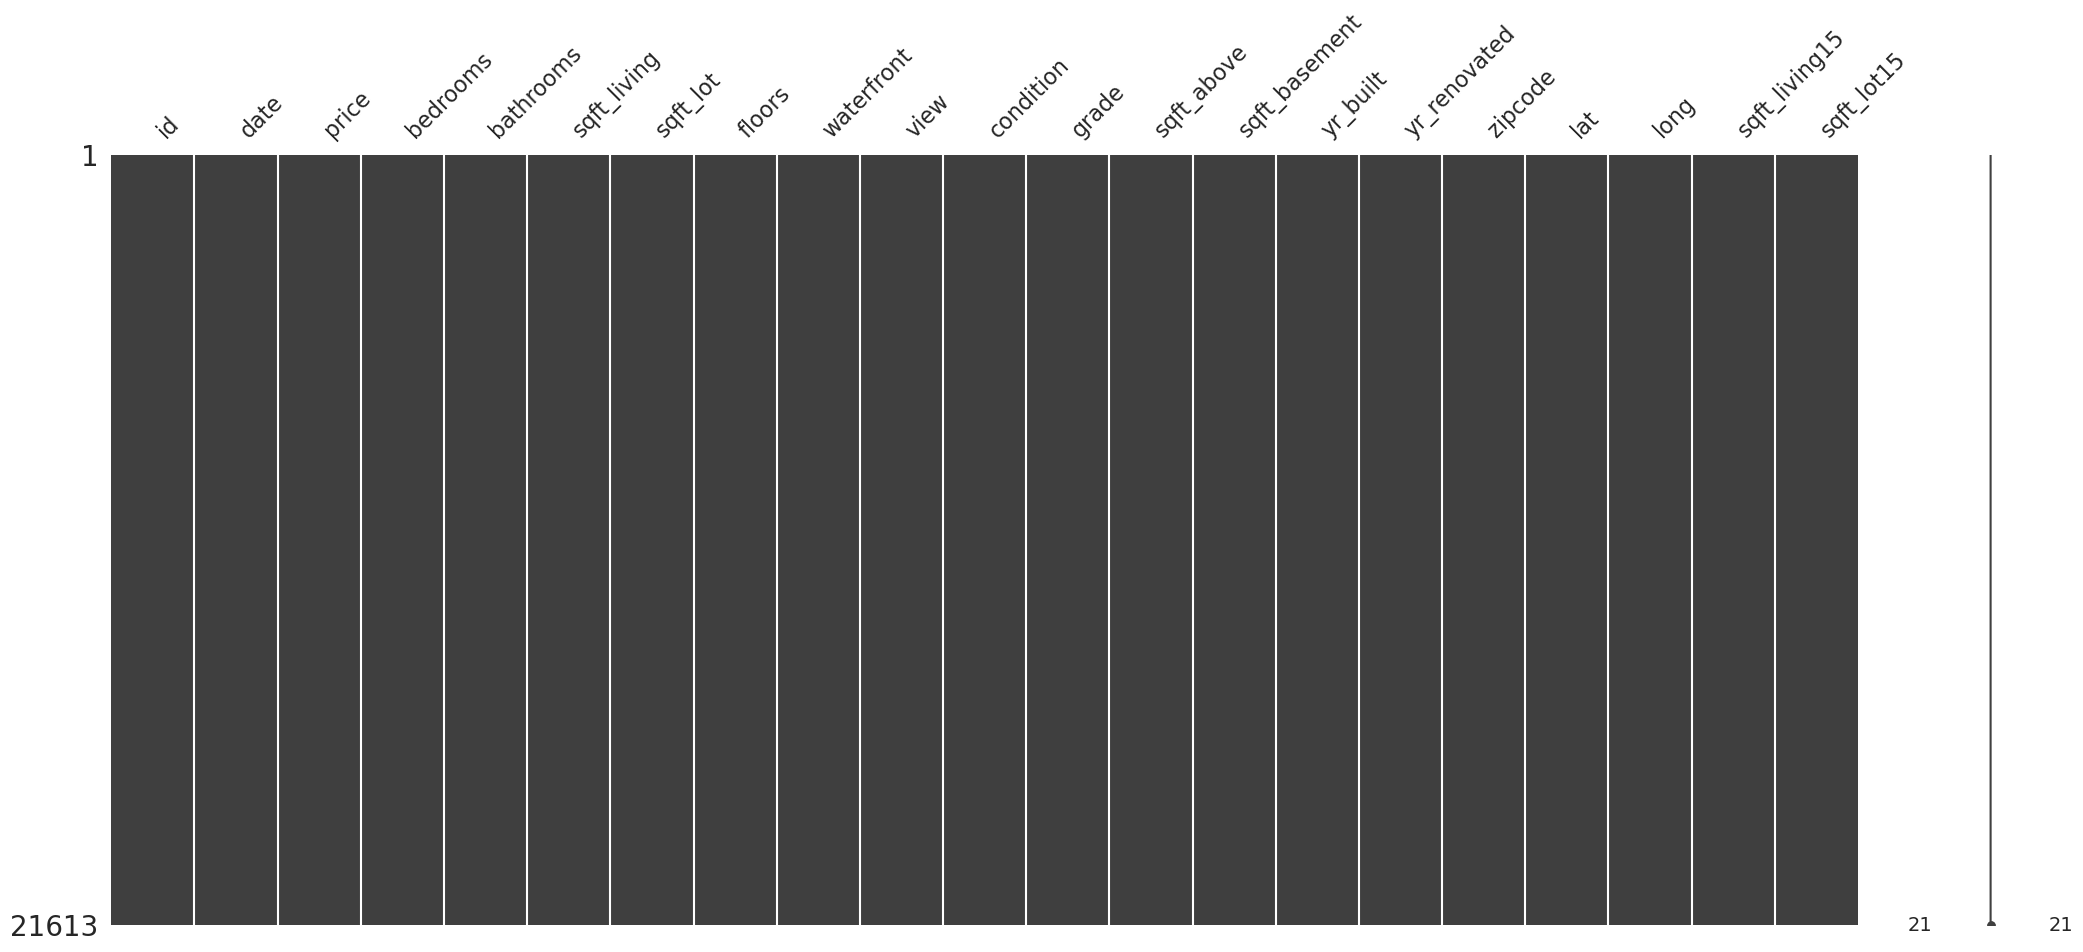

In [33]:
msno.matrix(df)

In [34]:
df.loc[df["bathrooms"] <0.50]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [35]:
chambre = df.loc[df["bedrooms"] < 1]
df.drop(chambre.index, inplace=True)

In [36]:
salle_de_bain = df.loc[df["bathrooms"] < 0.50]
df.drop(salle_de_bain.index, inplace=True)

In [39]:
conver_surface_maison = df.sqft_living * 0.092903
conver_surface_terrain = df.sqft_lot * 0.092903
conver_surface_grenier = df.sqft_above * 0.092903
conver_surface_cave = df.sqft_basement * 0.092903
conver_surface_maison_voisin = df.sqft_living15 * 0.092903
conver_surface_terrain_voisin = df.sqft_lot15 * 0.092903

In [40]:
surface_maison = df["sqft_living"] = conver_surface_maison
surface_terrain = df["sqft_lot"] = conver_surface_terrain
surface_grenier = df["sqft_above"] = conver_surface_grenier
surface_cave = df["sqft_basement"] = conver_surface_cave
surface_maison_voisin = df["sqft_living15"] = conver_surface_maison_voisin
surface_terrain_voisin = df["sqft_lot15"] = conver_surface_terrain_voisin

print(surface_maison)

0        109.62554
1        238.76071
2         71.53531
3        182.08988
4        156.07704
           ...    
21608    142.14159
21609    214.60593
21610     94.76106
21611    148.64480
21612     94.76106
Name: sqft_living, Length: 21597, dtype: float64


In [41]:
for i in df.index :
    if df.loc[i, "yr_renovated"] == 0 :
        df.loc[i, "yr_renovated"] = df.loc[i, "yr_built"]
df.head(25)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,109.625540,524.901950,1.0,0,0,3,7,109.625540,0.00000,1955,1955,98178,47.5112,-122.257,124.490020,524.901950
1,6414100192,20141209T000000,538000.0,3,2.25,238.760710,672.803526,2.0,0,0,3,7,201.599510,37.16120,1951,1991,98125,47.7210,-122.319,157.006070,709.686017
2,5631500400,20150225T000000,180000.0,2,1.00,71.535310,929.030000,1.0,0,0,3,6,71.535310,0.00000,1933,1933,98028,47.7379,-122.233,252.696160,748.983986
3,2487200875,20141209T000000,604000.0,4,3.00,182.089880,464.515000,1.0,0,0,5,7,97.548150,84.54173,1965,1965,98136,47.5208,-122.393,126.348080,464.515000
4,1954400510,20150218T000000,510000.0,3,2.00,156.077040,750.656240,1.0,0,0,3,8,156.077040,0.00000,1987,1987,98074,47.6168,-122.045,167.225400,697.051209
5,7237550310,20140512T000000,1225000.0,4,4.50,503.534260,9469.602790,1.0,0,0,3,11,361.392670,142.14159,2001,2001,98053,47.6561,-122.005,442.218280,9469.602790
6,1321400060,20140627T000000,257500.0,3,2.25,159.328645,633.505557,2.0,0,0,3,7,159.328645,0.00000,1995,1995,98003,47.3097,-122.327,207.916914,633.505557
7,2008000270,20150115T000000,291850.0,3,1.50,98.477180,902.181033,1.0,0,0,3,7,98.477180,0.00000,1963,1963,98198,47.4095,-122.315,153.289950,902.181033
8,2414600126,20150415T000000,229500.0,3,1.00,165.367340,693.985410,1.0,0,0,3,7,97.548150,67.81919,1960,1960,98146,47.5123,-122.337,165.367340,753.722039
9,3793500160,20150312T000000,323000.0,3,2.50,175.586670,609.443680,2.0,0,0,3,7,175.586670,0.00000,2003,2003,98038,47.3684,-122.031,222.038170,703.275710


<AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>

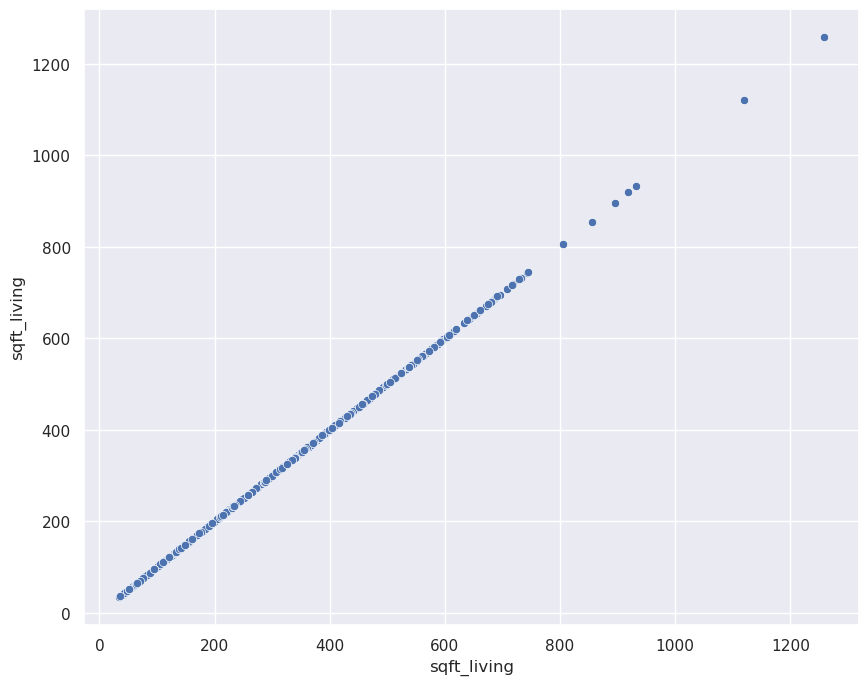

In [42]:
sns.set(rc = {"figure.figsize" : (10,8)})
sns.scatterplot(df, x="sqft_living", y="sqft_living")

In [43]:
df.loc[df["sqft_living"] > 1000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,1119.48115,2564.122800,2.5,0,3,4,13,796.17871,323.30244,1910,1987,98102,47.6298,-122.323,366.03782,817.5464
12777,1225069038,20140505T000000,2280000.0,7,8.0,1257.90662,28591.084056,3.0,0,4,3,12,874.21723,383.68939,1999,1999,98053,47.6675,-121.986,450.57955,20234.2734


In [44]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402029e+05,3.373200,2.115826,193.268141,1402.780372,1.494096,0.007547,0.234292,3.409825,7.657915,166.166012,27.102128,1970.999676,1973.382322,98077.951845,47.560093,-122.213982,184.562987,1185.282813
std,2.876736e+09,3.671337e+05,0.926299,0.768984,85.294813,3847.358204,0.539683,0.086549,0.766390,0.650546,1.173200,76.901365,41.125167,29.375234,28.808668,53.513072,0.138552,0.140724,63.659967,2533.877481
min,1.000102e+06,7.800000e+04,1.000000,0.500000,34.374110,48.309560,1.000000,0.000000,0.000000,1.000000,3.000000,34.374110,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,37.068297,60.479853
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,132.851290,468.231120,1.000000,0.000000,0.000000,3.000000,7.000000,110.554570,0.000000,1951.000000,1954.000000,98033.000000,47.471100,-122.328000,138.425470,473.805300
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,177.444730,707.735054,1.500000,0.000000,0.000000,3.000000,7.000000,144.928680,0.000000,1975.000000,1977.000000,98065.000000,47.571800,-122.231000,170.941520,707.920860
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,236.902650,992.668555,2.000000,0.000000,0.000000,4.000000,8.000000,205.315630,52.025680,1997.000000,1999.000000,98118.000000,47.678000,-122.125000,219.251080,936.740949
max,9.900000e+09,7.700000e+06,33.000000,8.000000,1257.906620,153416.205177,3.500000,1.000000,4.000000,5.000000,13.000000,874.217230,447.792460,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,576.927630,80937.093600


In [46]:
df.zipcode.astype(str)
df = df.join(pd.get_dummies(df['zipcode']))

<AxesSubplot:>

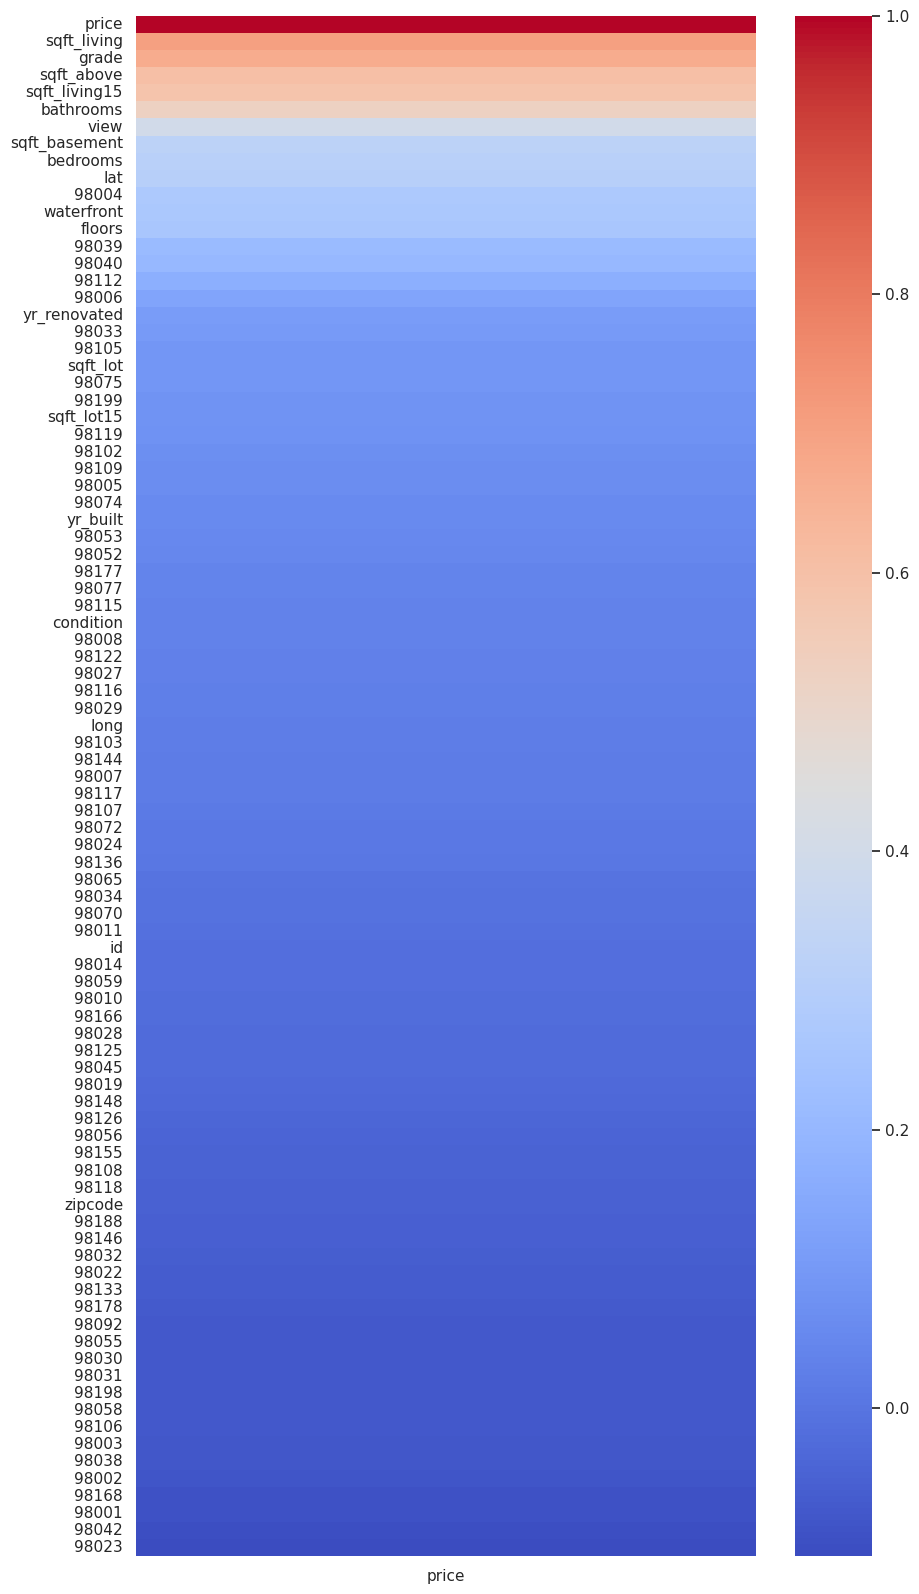

In [47]:
sns.set(rc = {"figure.figsize" : (10,20)})
sns.heatmap(df.corr()[["price"]].sort_values(ascending=False, by="price"), cmap="coolwarm")

In [48]:
df.drop(["id", "date", "zipcode"], axis=1, inplace=True)


<AxesSubplot:>

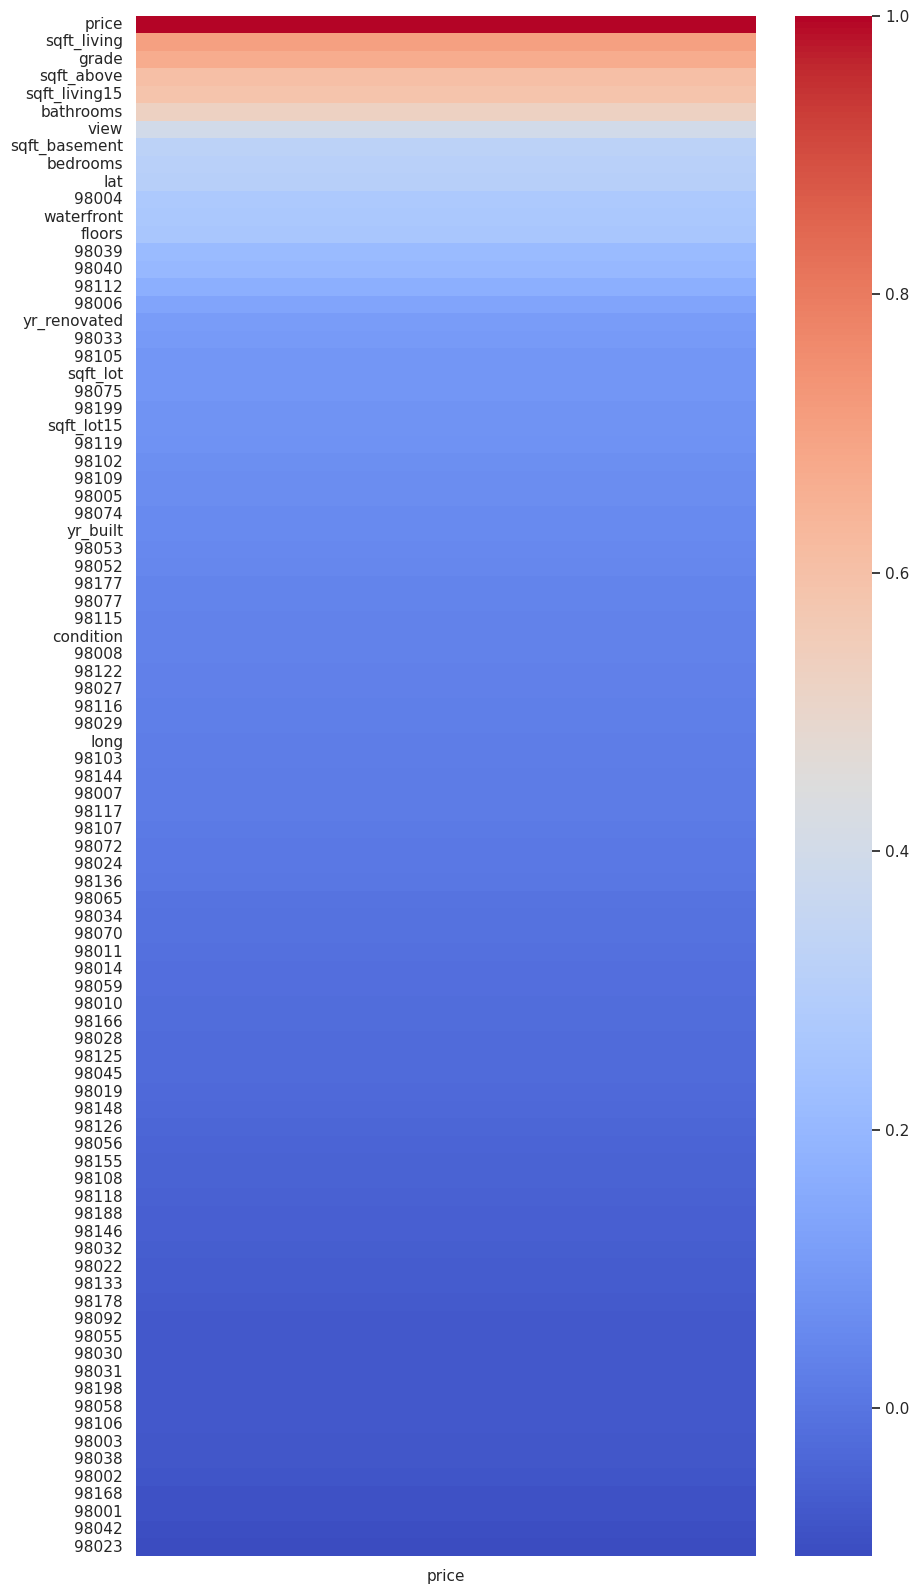

In [49]:
sns.set(rc = {"figure.figsize" : (10,20)})
sns.heatmap(df.corr()[["price"]].sort_values(ascending=False, by="price"), cmap="coolwarm")

In [50]:
df.to_csv("immobilier2.csv", index=False)